# <span style="color:blue">  Esercio 7</span>


### Esercizio 07.1

Utilizzare il codice Monte Carlo NVT (N,V e T costanti, insieme canonico) per stampare i valori istantanei dell'energia potenziale, $U/N$, e della pressione, $P$. Calcolarli nelle seguenti condizioni termondinamiche:

- solid phase: $\rho^\star = 1.1$, $T^\star = 0.8$ (cut-off radius: $r_c = 2.2$)
- liquid phase: $\rho^\star = 0.8$, $T^\star = 1.1$ (cut-off radius: $r_c = 2.5$)
- gas phase: $\rho^\star = 0.05$, $T^\star = 1.2$ (cut-off radius: $r_c = 5.0$)

1. <span style="color:red">Calcolarsi quindi l'autocorrelazione (e mostrarne il grafico) per $U/N$ e $P$. Fittarle poi con una funzione esponenziale.
2. Graficare le incertezze di $U/N$ e $P$ variando la grandezza del blocco ($L=M/N=10$ a $L=5\times 10^3$). Mostrare grafico dell'incertezza statistica al variare di $L$.

### Autocorrelazione LIquido

optimized parameters [a,b] =
[0.61918301 0.02091995]
parameters uncertainty =
[0.01171714 0.00056573]
optimized parameters [a,b] =
[0.58568294 0.02408432]
parameters uncertainty =
[0.01125269 0.0006623 ]


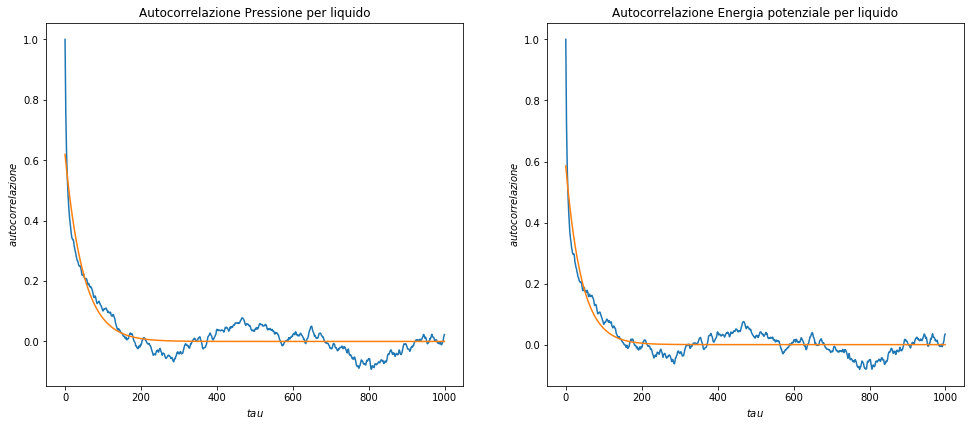

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.optimize import curve_fit

pres= np.loadtxt("liquid_pres.dat",unpack=True) #liquido
epot= np.loadtxt("liquid_epot.dat",unpack=True)


N=len(pres)

auto_p= np.zeros(1000)
auto_e= np.zeros(1000)
tauv= np.zeros(1000)

x_ave=0
x2_ave=0
y_ave=0
y2_ave=0

for n in range(0,N-1000):
	x_ave += pres[n]
	y_ave += epot[n]
	x2_ave += pres[n]*pres[n]
	y2_ave += epot[n]*epot[n]


x_ave = x_ave/(N-1000)
x2_ave = x2_ave/(N-1000) 
var_p= x2_ave - x_ave*x_ave

y_ave = y_ave/(N-1000)
y2_ave = y2_ave/(N-1000) 
var_e= y2_ave - y_ave*y_ave


for tau in range(0,1000):
	sum_p=0
	ave_p=0
	sum_e=0
	ave_e=0
	for i in range(0,N-1000):
		sum_p += pres[i]*pres[i+tau] 
		sum_e += epot[i]*epot[i+tau]
	for j in range(0,N-1000):
		ave_p += pres[j+tau] 
		ave_e += epot[j+tau]
	auto_p[tau] = ((sum_p)/(N-1000) - (x_ave * ave_p/(N-1000)))/var_p
	auto_e[tau] = ((sum_e)/(N-1000) - (y_ave * ave_e/(N-1000)))/var_e # Formula autocorrelazione


for t in range(0,1000):
	tauv[t] = t


def exponential_func(x, a, b):
    return a*np.exp(-b*x)  
               
               
p_opt, p_cov = curve_fit(exponential_func, tauv, auto_p)
y_fit = exponential_func(tauv,p_opt[0],p_opt[1])

               
p1_opt, p1_cov = curve_fit(exponential_func, tauv, auto_e)
y1_fit = exponential_func(tauv,p1_opt[0],p1_opt[1])


print("optimized parameters [a,b] =")
print(p_opt)
print("parameters uncertainty =")
print(np.sqrt(np.diagonal(p_cov)))

print("optimized parameters [a,b] =")
print(p1_opt)
print("parameters uncertainty =")
print(np.sqrt(np.diagonal(p1_cov)))

plt.figure(figsize=(15,6))

plt.subplot(121)                                            
plt.plot(tauv,auto_p)
plt.xlabel('$tau$')
plt.ylabel('$autocorrelazione$')
plt.plot(tauv,y_fit,label='fit')
plt.title('Autocorrelazione Pressione per liquido')
 
    
plt.subplot(122)    
plt.plot(tauv,auto_e)
plt.xlabel('$tau$')
plt.ylabel('$autocorrelazione$')
plt.plot(tauv,y1_fit,label='fit')
plt.title('Autocorrelazione Energia potenziale per liquido')               
 
    
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.0,
                    wspace=0.2)    
               
plt.show()



### Autocorrelazione Solido

optimized parameters [a,b] =
[0.85106291 0.10247346]
parameters uncertainty =
[0.01472653 0.00263709]
optimized parameters [a,b] =
[0.85042315 0.1003037 ]
parameters uncertainty =
[0.01469843 0.00257557]


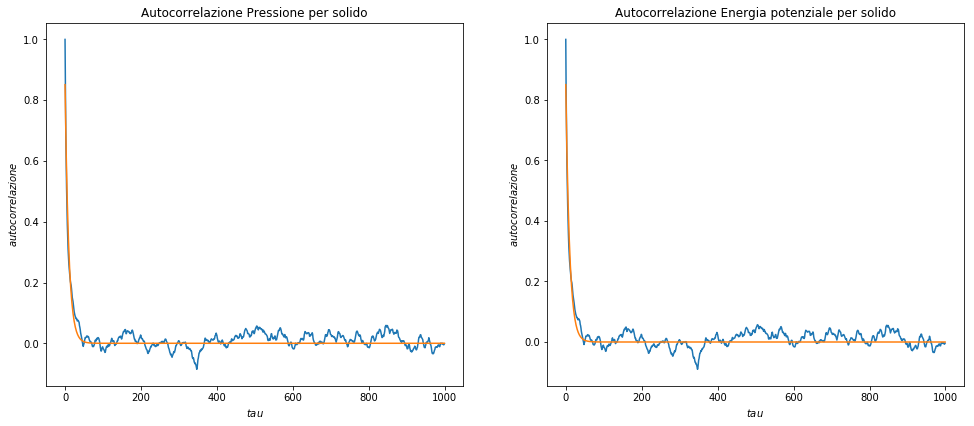

In [2]:
pres= np.loadtxt("solid_pres.dat",unpack=True) #solido
epot= np.loadtxt("solid_epot.dat",unpack=True)


N=len(pres)

auto= np.zeros(1000)
tauv= np.zeros(1000)

auto_p= np.zeros(1000)
auto_e= np.zeros(1000)
tauv= np.zeros(1000)

x_ave=0
x2_ave=0
y_ave=0
y2_ave=0

for n in range(0,N-1000):
	x_ave += pres[n]
	y_ave += epot[n]
	x2_ave += pres[n]*pres[n]
	y2_ave += epot[n]*epot[n]


x_ave = x_ave/(N-1000)
x2_ave = x2_ave/(N-1000) 
var_p= x2_ave - x_ave*x_ave

y_ave = y_ave/(N-1000)
y2_ave = y2_ave/(N-1000) 
var_e= y2_ave - y_ave*y_ave


for tau in range(0,1000):
	sum_p=0
	ave_p=0
	sum_e=0
	ave_e=0
	for i in range(0,N-1000):
		sum_p += pres[i]*pres[i+tau] 
		sum_e += epot[i]*epot[i+tau]
	for j in range(0,N-1000):
		ave_p += pres[j+tau] 
		ave_e += epot[j+tau]
	auto_p[tau] = ((sum_p)/(N-1000) - (x_ave * ave_p/(N-1000)))/var_p
	auto_e[tau] = ((sum_e)/(N-1000) - (y_ave * ave_e/(N-1000)))/var_e


for t in range(0,1000):
	tauv[t] = t


def exponential_func(x, a, b):
    return a*np.exp(-b*x)  
               
               
p_opt, p_cov = curve_fit(exponential_func, tauv, auto_p)
y_fit = exponential_func(tauv,p_opt[0],p_opt[1])

               
p1_opt, p1_cov = curve_fit(exponential_func, tauv, auto_e)
y1_fit = exponential_func(tauv,p1_opt[0],p1_opt[1])


print("optimized parameters [a,b] =")
print(p_opt)
print("parameters uncertainty =")
print(np.sqrt(np.diagonal(p_cov)))

print("optimized parameters [a,b] =")
print(p1_opt)
print("parameters uncertainty =")
print(np.sqrt(np.diagonal(p1_cov)))

plt.figure(figsize=(15,6))

plt.subplot(121)                                            
plt.plot(tauv,auto_p)
plt.xlabel('$tau$')
plt.ylabel('$autocorrelazione$')
plt.plot(tauv,y_fit,label='fit')
plt.title('Autocorrelazione Pressione per solido')
 
    
plt.subplot(122)    
plt.plot(tauv,auto_e)
plt.xlabel('$tau$')
plt.ylabel('$autocorrelazione$')
plt.plot(tauv,y1_fit,label='fit')
plt.title('Autocorrelazione Energia potenziale per solido')               
 
    
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.0,
                    wspace=0.2)    
               
plt.show()



### Autocorrelazione Gas

optimized parameters [a,b] =
[0.99903869 1.22422639]
parameters uncertainty =
[0.0114817  0.03426223]
optimized parameters [a,b] =
[0.9116434  0.26398198]
parameters uncertainty =
[0.01269685 0.00590001]


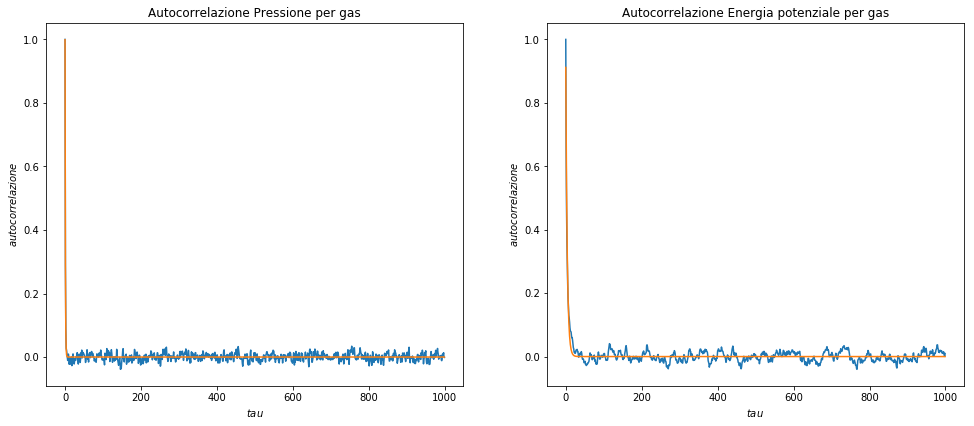

In [4]:
pres= np.loadtxt("gas_pres.dat",unpack=True) #gas
epot= np.loadtxt("gas_epot.dat",unpack=True)


N=len(pres)

auto_p= np.zeros(1000)
auto_e= np.zeros(1000)
tauv= np.zeros(1000)

x_ave=0
x2_ave=0
y_ave=0
y2_ave=0

for n in range(0,N-1000):
	x_ave += pres[n]
	y_ave += epot[n]
	x2_ave += pres[n]*pres[n]
	y2_ave += epot[n]*epot[n]


x_ave = x_ave/(N-1000)
x2_ave = x2_ave/(N-1000) 
var_p= x2_ave - x_ave*x_ave

y_ave = y_ave/(N-1000)
y2_ave = y2_ave/(N-1000) 
var_e= y2_ave - y_ave*y_ave


for tau in range(0,1000):
	sum_p=0
	ave_p=0
	sum_e=0
	ave_e=0
	for i in range(0,N-1000):
		sum_p += pres[i]*pres[i+tau] 
		sum_e += epot[i]*epot[i+tau]
	for j in range(0,N-1000):
		ave_p += pres[j+tau] 
		ave_e += epot[j+tau]
	auto_p[tau] = ((sum_p)/(N-1000) - (x_ave * ave_p/(N-1000)))/var_p
	auto_e[tau] = ((sum_e)/(N-1000) - (y_ave * ave_e/(N-1000)))/var_e


for t in range(0,1000):
	tauv[t] = t


def exponential_func(x, a, b):
    return a*np.exp(-b*x)  
               
               
p_opt, p_cov = curve_fit(exponential_func, tauv, auto_p)
y_fit = exponential_func(tauv,p_opt[0],p_opt[1])

               
p1_opt, p1_cov = curve_fit(exponential_func, tauv, auto_e)
y1_fit = exponential_func(tauv,p1_opt[0],p1_opt[1])


print("optimized parameters [a,b] =")
print(p_opt)
print("parameters uncertainty =")
print(np.sqrt(np.diagonal(p_cov)))

print("optimized parameters [a,b] =")
print(p1_opt)
print("parameters uncertainty =")
print(np.sqrt(np.diagonal(p1_cov)))

plt.figure(figsize=(15,6))

plt.subplot(121)                                            
plt.plot(tauv,auto_p)
plt.xlabel('$tau$')
plt.ylabel('$autocorrelazione$')
plt.plot(tauv,y_fit,label='fit')
plt.title('Autocorrelazione Pressione per gas')
 
    
plt.subplot(122)    
plt.plot(tauv,auto_e)
plt.xlabel('$tau$')
plt.ylabel('$autocorrelazione$')
plt.plot(tauv,y1_fit,label='fit')
plt.title('Autocorrelazione Energia potenziale per gas')               
 
    
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.0,
                    wspace=0.2)    
               
plt.show()


Si deduce dalle immagini che il gas ha una autcorrelazione che va presto a zero (dovuta alle sue proprietà fisiche). Si può quindi utilizzare blocchi più piccoli rispetto agli altri stati per avere campioni veramente indipendenti, così da poter utilizzare il teorema del limite centrale per calcolarsi l'incertezza.

### Errore in funzione della size dei blocchi

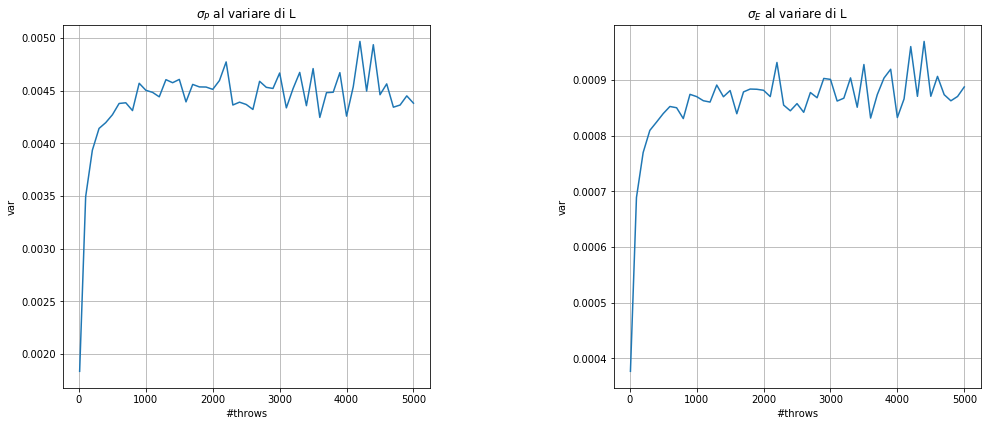

In [9]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
pres= np.loadtxt("autocorre/gas_pres.dat",unpack=True) #gas
epot= np.loadtxt("autocorre/gas_epot.dat",unpack=True)

N=len(pres)
L=np.arange(0,5100,100,dtype=int)
L[0]=10

var_p = np.zeros(len(L)) #deviazione standard
var_e = np.zeros(len(L))

M=0
somma_x=0
somma_y=0
blk_norm=0
pre=0
pre2=0
ene=0
ene2=0
ave_x=0
ave_y=0
        
for k in range(len(L)):
	M = int (N/L[k])
	for i in range(0,N): 
		ave_x += pres[i]
		ave_y += epot[i]
		blk_norm = blk_norm +1
		if i%L[k]==0 and i!=0 :
			somma_x = ave_x/blk_norm 
			somma_y = ave_y/blk_norm      
			pre += somma_x
			ene += somma_y
			pre2 += somma_x*somma_x
			ene2 += somma_y*somma_y
			ave_x=0   
			ave_y=0
			blk_norm=0
	var_p[k] = math.sqrt((pre2/M - (pre/M)*(pre/M))/M)
	var_e[k] = math.sqrt((ene2/ M - (ene/M)*(ene/M))/M)
	pre=0
	pre2=0
	ene=0
	ene2=0
plt.figure(figsize=(15,6))        
            
plt.subplot(121) 
plt.plot(L,var_p)
plt.xlabel('#throws')
plt.ylabel('var')
plt.grid(True)
plt.title( '$\sigma_{P}$ al variare di L')

plt.subplot(122) 
plt.plot(L,var_e)
plt.xlabel('#throws')
plt.ylabel('var')
plt.grid(True)
plt.title( '$\sigma_{E}$ al variare di L')

plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.0,
                    wspace=0.5) 


plt.show()

Raggiunto un certa "taglia" del blocco si vede che si arriva all'errore statistico vero dovuto all'utilizzo delle catene di Markov. L'errore non migliora più.

### Esercizio 07.2

<span style="color:red">Aggiungere il calcolo della funione di distribuzione radiale $g(r)$ come funzione della distanza $r$. 

### Esercizio 07.3

<span style="color:red">Fare l'esercizio 07.2 nel codice di MD </span>.

### Esercizio 07.4

Simulare  Argon ($\sigma = 0.34$ nm, $\epsilon/k_B = 120$ K, $m=39.948$ amu) e Krypton ($\sigma = 0.364$ nm, $\epsilon/k_B = 164$ K, $m=83.798$ amu) alle seguenti condizioni:
1. fase solida: $\rho^\star = 1.1$, $T^\star = 0.8$ (cut-off : $r_c = 2.2$)
2. fase liquida: $\rho^\star = 0.8$, $T^\star = 1.1$ (cut-off : $r_c = 2.5$)
3. fase gassosa: $\rho^\star = 0.05$, $T^\star = 1.2$ (cut-off : $r_c = 5.0$)

E mostrare grafici dei valori ottenuti in unità SI. Comparare i grafici di $g(r)$ con quelli ottenuti con l'algoritmo di MD.

### Energia Potenziale Argon & Krypton Liquido

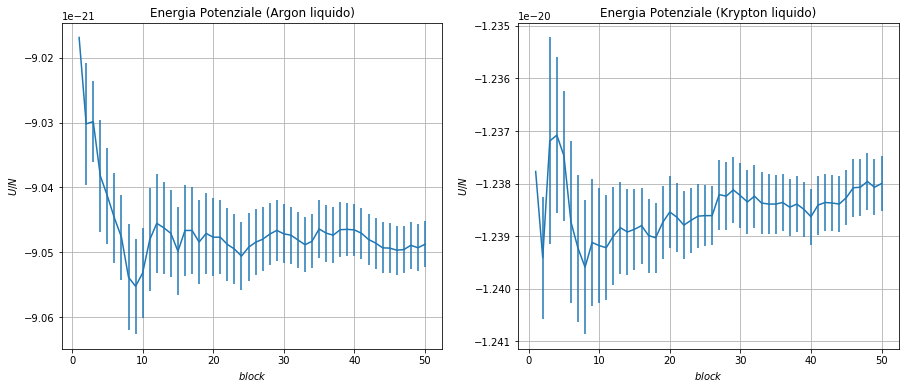

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

y,erry,x= np.loadtxt("Argon/Argon_L.epot.dat",unpack=True)
y1,erry1,x1= np.loadtxt("Krypton/Krypton_L.epot.dat",unpack=True)

plt.figure(figsize=(15,6))

plt.subplot(121) 
plt.errorbar(x,y,yerr=erry)
plt.xlabel('$block$')
plt.ylabel('$U/N$')
plt.grid(True)
plt.title('Energia Potenziale (Argon liquido)')

plt.subplot(122) 
plt.errorbar(x1,y1,yerr=erry1)
plt.xlabel('$block$')
plt.ylabel('$U/N$')
plt.grid(True)
plt.title('Energia Potenziale (Krypton liquido)')

plt.show()

###  Pressione Argon & Krypton Liquido

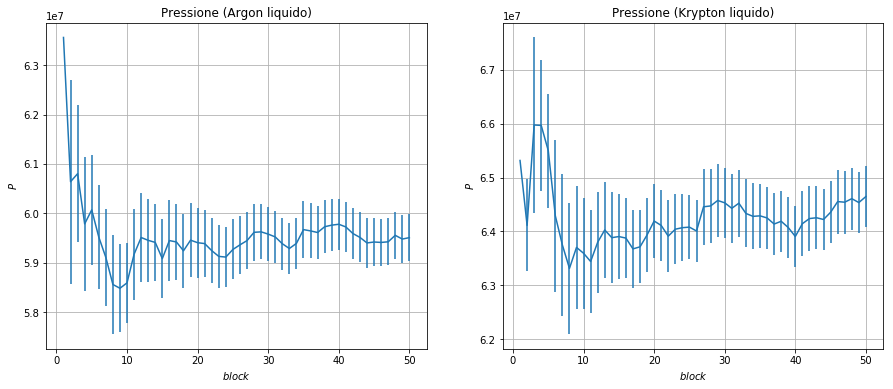

In [24]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

y,erry,x= np.loadtxt("Argon/Argon_L.press.dat",unpack=True)
y1,erry1,x1= np.loadtxt("Krypton/Krypton_L.press.dat",unpack=True)

plt.figure(figsize=(15,6))

plt.subplot(121) 
plt.errorbar(x,y,yerr=erry)
plt.xlabel('$block$')
plt.ylabel('$P$')
plt.grid(True)
plt.title('Pressione (Argon liquido)')

plt.subplot(122) 
plt.errorbar(x1,y1,yerr=erry1)
plt.xlabel('$block$')
plt.ylabel('$P$')
plt.grid(True)
plt.title('Pressione (Krypton liquido)')

plt.show()

### G(r) Argon & Krypton Liquido

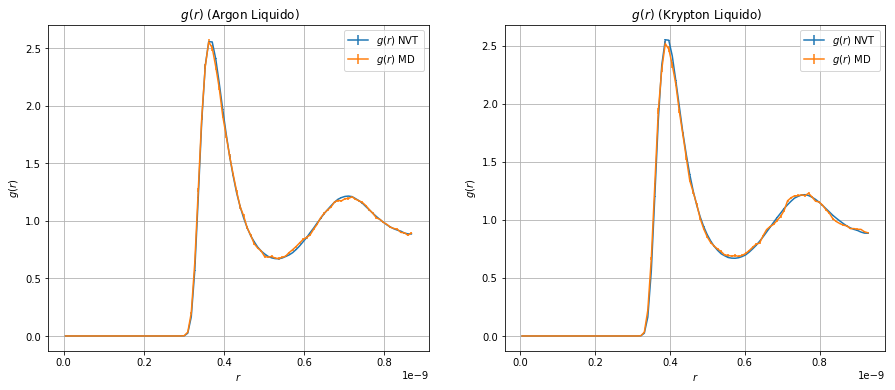

In [5]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

a,b,x,y,erry= np.loadtxt("Argon/Argon_L.gofr.dat",unpack=True)
a1,b1,x1,y1,erry1 = np.loadtxt("Krypton/Krypton_L.gofr.dat",unpack=True)
a2,b2,x2,y2,erry2 = np.loadtxt("A&KMD/Argon_L.gofr.dat",unpack=True)
a,b3,x3,y3,erry3 = np.loadtxt("A&KMD/Krypton_L.gofr.dat",unpack=True)


plt.figure(figsize=(15,6))

plt.subplot(121) 
plt.errorbar(x,y,yerr=erry,label='$g(r)$ NVT')
plt.errorbar(x2,y2,yerr=erry2,label='$g(r)$ MD')
plt.xlabel('$r$')
plt.ylabel('$g(r)$')
plt.grid(True)
plt.title(' $g(r)$ (Argon Liquido)')
plt.legend(loc ='upper right')


plt.subplot(122) 
plt.errorbar(x1,y1,yerr=erry1,label='$g(r)$ NVT')
plt.errorbar(x3,y3,yerr=erry3,label='$g(r)$ MD')
plt.xlabel('$r$')
plt.ylabel('$g(r)$')
plt.grid(True)
plt.title(' $g(r)$ (Krypton Liquido)')
plt.legend(loc ='upper right')


plt.show()

### Energia Potenziale Argon & Krypton Gas

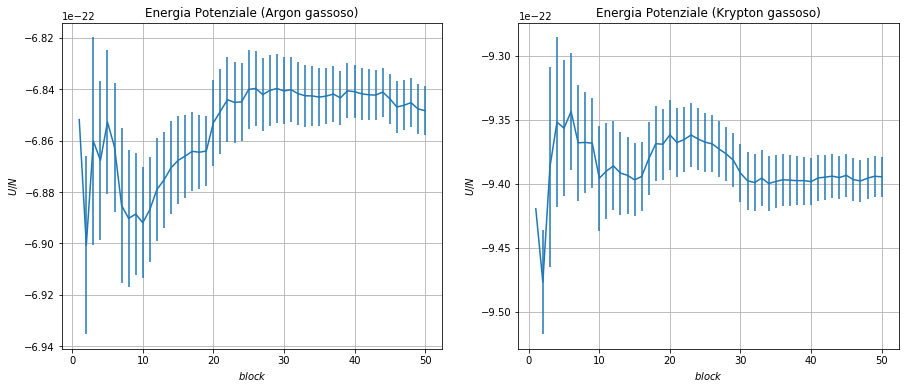

In [29]:
y,erry,x= np.loadtxt("Argon/Argon_G.epot.dat",unpack=True)
y1,erry1,x1= np.loadtxt("Krypton/Krypton_G.epot.dat",unpack=True)

plt.figure(figsize=(15,6))

plt.subplot(121) 
plt.errorbar(x,y,yerr=erry)
plt.xlabel('$block$')
plt.ylabel('$U/N$')
plt.grid(True)
plt.title('Energia Potenziale (Argon gassoso)')

plt.subplot(122) 
plt.errorbar(x1,y1,yerr=erry1)
plt.xlabel('$block$')
plt.ylabel('$U/N$')
plt.grid(True)
plt.title('Energia Potenziale (Krypton gassoso)')

plt.show()

### Pressione Argon & Krypton Gas

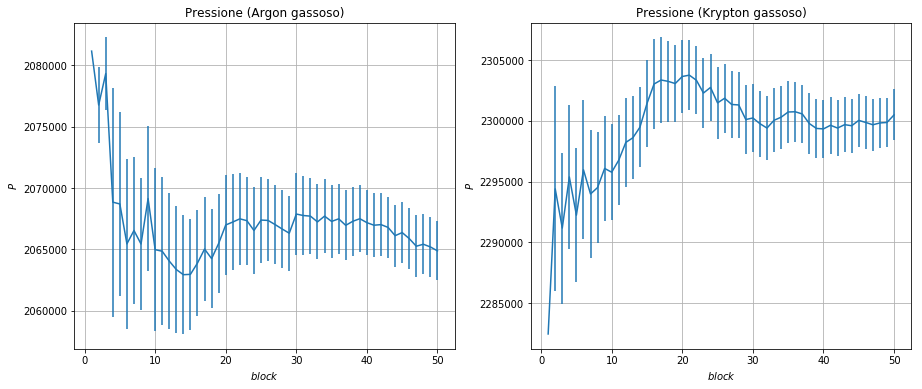

In [30]:
y,erry,x= np.loadtxt("Argon/Argon_G.press.dat",unpack=True)
y1,erry1,x1= np.loadtxt("Krypton/Krypton_G.press.dat",unpack=True)

plt.figure(figsize=(15,6))

plt.subplot(121) 
plt.errorbar(x,y,yerr=erry)
plt.xlabel('$block$')
plt.ylabel('$P$')
plt.grid(True)
plt.title('Pressione (Argon gassoso)')

plt.subplot(122) 
plt.errorbar(x1,y1,yerr=erry1)
plt.xlabel('$block$')
plt.ylabel('$P$')
plt.grid(True)
plt.title('Pressione (Krypton gassoso)')

plt.show()

### G(r) Argon & Krypton Gas

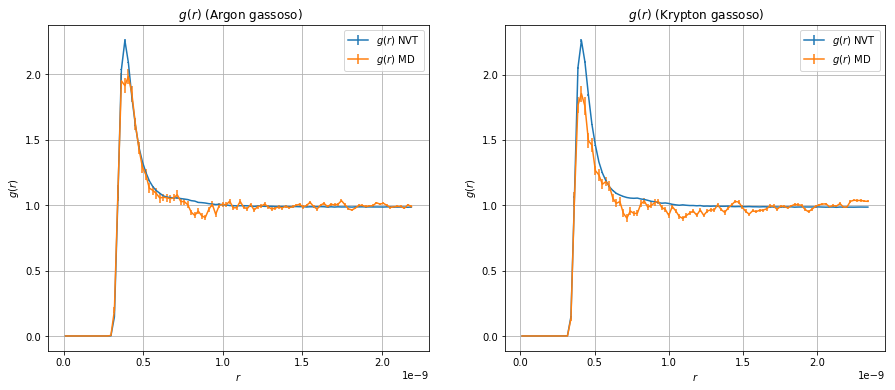

In [4]:
a,b,x,y,erry= np.loadtxt("Argon/Argon_G.gofr.dat",unpack=True)
a1,b1,x1,y1,erry1 = np.loadtxt("Krypton/Krypton_G.gofr.dat",unpack=True)
a2,b2,x2,y2,erry2 = np.loadtxt("A&KMD/Argon_G.gofr.dat",unpack=True)
a,b3,x3,y3,erry3 = np.loadtxt("A&KMD/Krypton_G.gofr.dat",unpack=True)

plt.figure(figsize=(15,6))

plt.subplot(121) 
plt.errorbar(x,y,yerr=erry, label='$g(r)$ NVT')
plt.errorbar(x2,y2,yerr=erry2, label='$g(r)$ MD')
plt.xlabel('$r$')
plt.ylabel('$g(r)$')
plt.grid(True)
plt.title(' $g(r)$ (Argon gassoso)')
plt.legend(loc ='upper right')


plt.subplot(122) 
plt.errorbar(x1,y1,yerr=erry1, label='$g(r)$ NVT')
plt.errorbar(x3,y3,yerr=erry3, label='$g(r)$ MD')
plt.xlabel('$r$')
plt.ylabel('$g(r)$')
plt.grid(True)
plt.title(' $g(r)$ (Krypton gassoso)')
plt.legend(loc ='upper right')

plt.show()

### Energia Potenziale Argon & Krypton Solido

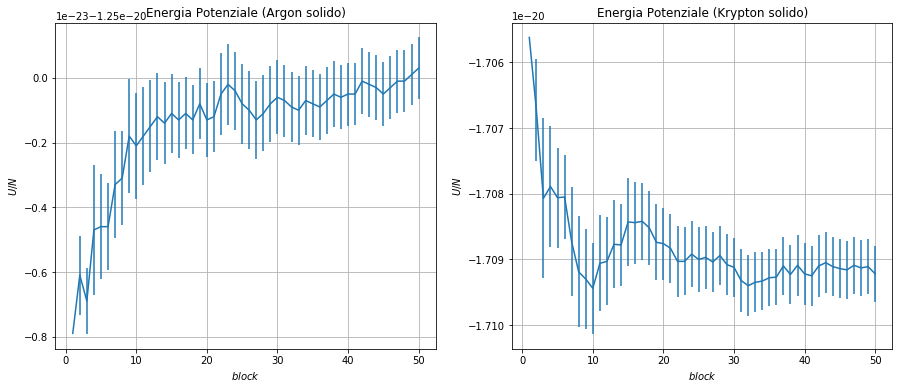

In [62]:
y,erry,x= np.loadtxt("Argon/Argon_S.epot.dat",unpack=True)
y1,erry1,x1= np.loadtxt("Krypton/Krypton_S.epot.dat",unpack=True)

plt.figure(figsize=(15,6))

plt.subplot(121) 
plt.errorbar(x,y,yerr=erry)
plt.xlabel('$block$')
plt.ylabel('$U/N$')
plt.grid(True)
plt.title('Energia Potenziale (Argon solido)')

plt.subplot(122) 
plt.errorbar(x1,y1,yerr=erry1)
plt.xlabel('$block$')
plt.ylabel('$U/N$')
plt.grid(True)
plt.title('Energia Potenziale (Krypton solido)')

plt.show()

###  Pressione Argon & Krypton Solido

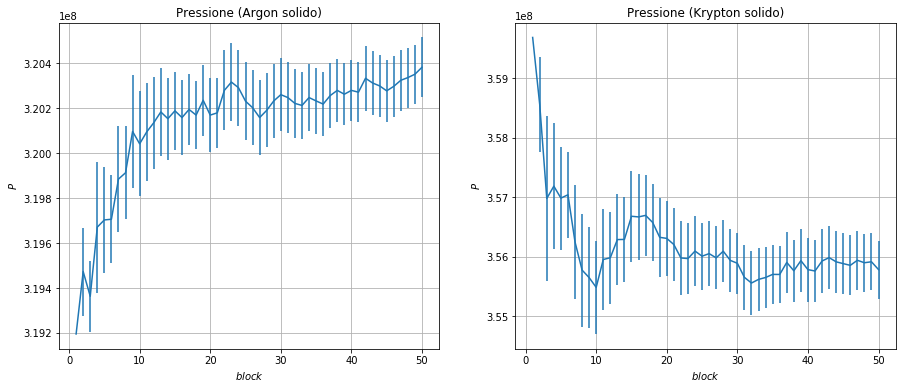

In [61]:
y,erry,x= np.loadtxt("Argon/Argon_S.press.dat",unpack=True)
y1,erry1,x1= np.loadtxt("Krypton/Krypton_S.press.dat",unpack=True)

plt.figure(figsize=(15,6))

plt.subplot(121) 
plt.errorbar(x,y,yerr=erry)
plt.xlabel('$block$')
plt.ylabel('$P$')
plt.grid(True)
plt.title('Pressione (Argon solido)')

plt.subplot(122) 
plt.errorbar(x1,y1,yerr=erry1)
plt.xlabel('$block$')
plt.ylabel('$P$')
plt.grid(True)
plt.title('Pressione (Krypton solido)')

plt.show()

### G(r) Argon & Krypton Solido

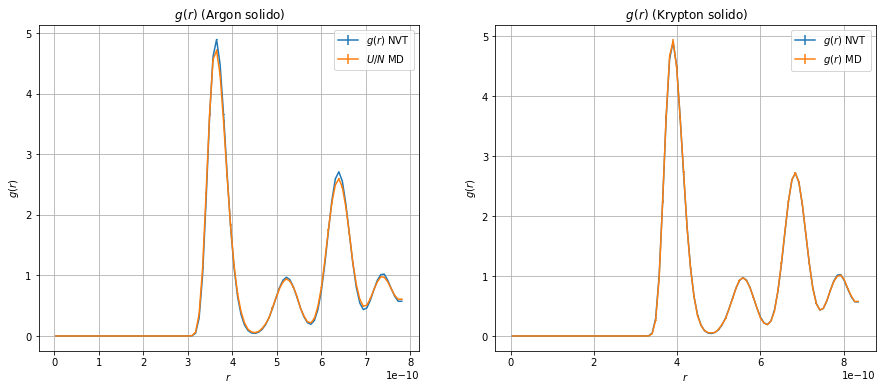

In [3]:
a,b,x,y,erry= np.loadtxt("Argon/Argon_S.gofr.dat",unpack=True)
a1,b1,x1,y1,erry1 = np.loadtxt("Krypton/Krypton_S.gofr.dat",unpack=True)
a2,b2,x2,y2,erry2 = np.loadtxt("A&KMD/Argon_S.gofr.dat",unpack=True)
a,b3,x3,y3,erry3 = np.loadtxt("A&KMD/Krypton_S.gofr.dat",unpack=True)

plt.figure(figsize=(15,6))

plt.subplot(121) 
plt.errorbar(x,y,yerr=erry, label='$g(r)$ NVT')
plt.errorbar(x2,y2,yerr=erry2, label='$g(r)$ MD')
plt.xlabel('$r$')
plt.ylabel('$g(r)$')
plt.grid(True)
plt.title(' $g(r)$ (Argon solido)')
plt.legend(loc ='upper right')


plt.subplot(122) 
plt.errorbar(x1,y1,yerr=erry1, label='$g(r)$ NVT')
plt.errorbar(x3,y3,yerr=erry3, label='$g(r)$ MD')
plt.xlabel('$r$')
plt.ylabel('$g(r)$')
plt.grid(True)
plt.title(' $g(r)$ (Krypton solido)')
plt.legend(loc ='upper right')


plt.show()